<a href="https://colab.research.google.com/github/985emily/WORD_CLOUD_PROYECT/blob/master/PROYECTO_C%C3%93DIGO_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CÓDIGO FINAL


*   PARA EVIATR ERRORES POR PARTE DE USURIO SE AGREGO UNA EXCEPCIÓN



Ingrese un usuario: 
25
ID DE USUARIO:25
NOMBRE: rnrneverdies
NOMBRE: rnrneverdies
Procesando...
Las etiquetas del usuario rnrneverdies son: 
['javascript', 'google-maps', 'asp.net', 'regex', 'html', 'comparaciones', 'momentjs', 'asp.net-mvc', 'jquery', 'css3', 'ionic', 'angularjs-2.0', 'css', 'c', 'variables-globales', 'linq', 'java', 'bootstrap', 'patrones-de-diseño', 'asincronismo', 'html5', 'android', 'aplicación-web', 'ecmascript-2015', 'c++', 'git', 'powershell', 'sql-server', 'array', 'clausuras', 'encriptación', 'fullcalendar', 'angularjs', 'string', 'perl', 'postgresql', 'php', 'google-chrome', 'windows10', 'librería', 'json', 'ajax', 'http', 'iteraciones', 'c#', 'variables', 'sql', 'bower', 'nodejs', 'mysql', 'linux', 'bash', 'post', 'typescript', 'angularjs-injector', 'google-analytics', 'github', 'conflictos', 'base-de-datos', 'redes-neuronales', 'facebook-api', 'wcf', 'npm', 'namespace', 'manejo-de-memoria', 'xml', 'pdf', 'redirección', 'punteros', 'funciones', 'xhtml', 'd

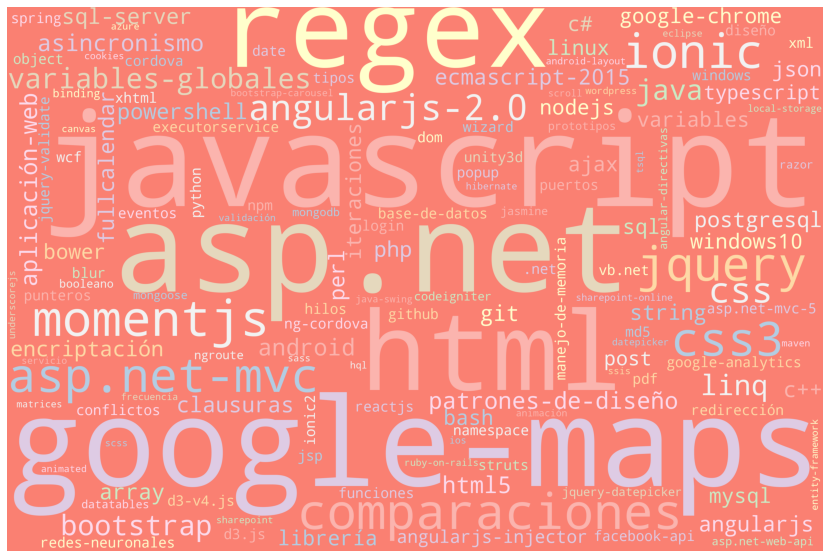

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

from bs4 import BeautifulSoup
import requests
import pandas as pd


print("Ingrese un usuario: ")
usuario = input()
print("ID DE USUARIO:" +usuario)

#Implementa ID de usuario
page = requests.get("https://es.stackoverflow.com/users/"+usuario)
soup = BeautifulSoup(page.content,'html.parser')

#obtener nombre usuario

try:
  Nusuario = soup.find('div',class_="grid--cell fw-bold").text
  print("NOMBRE: "+Nusuario)
  print("Procesando...")

  #Implementa Nombre de usuario
  url = "https://es.stackoverflow.com/users/"+usuario+"/"+Nusuario+"?tab=tags" + "&sort=votes&page="


  #Definir listas de tags y Numero de Tags 
  #Se guardan los Tags obtenidos de la URL en las listas correspondientes
  tags = list()

  Ntags = list()

  #Se crea una lista nueva definida en conjunto relacionando los valores anteriores
  listacomplit = list()
  cont = list()
  #conseguir el numero de rango
  for page in range(1,15):

      r = requests.get(url + str(page))
      
      soup = BeautifulSoup(r.content, "html.parser")
      td = soup.find_all("td")

      #Tags
      for i in td:  
        tags.append(i.find('a', class_='post-tag').text)

      #Ntags

      
        

      for i in td:
        Ntags.append(i.find('div', class_='answer-votes').text)

      #Procesa Tags con Numeros  
      for i in range(len(tags)):
        if (int(Ntags[i])> 0):
          if Ntags[i] == "3k" or "2k" or "1k":
              Ntags[i]=2000
          else: 
            Ntags[i]= Ntags

          for k in range(int(Ntags[i])):
                listacomplit.append(tags[i]) 
        
  print("Las etiquetas del usuario "+ Nusuario+" son: ") 
  print(tags) 
  print("Creando nube de palabras...")

  #Nube de palabras
  # Define a function to plot word cloud
  try:
    def plot_cloud(wordcloud):
      # Set figure size
      plt.figure(figsize=(20, 10))
      # Display image
      plt.imshow(wordcloud) 
      # No axis details
      plt.axis("off");
      
    # Generate word cloud
    wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', 
                        collocations=False, stopwords = STOPWORDS, regexp= r"\S[\S']+" ).generate(' '.join(listacomplit))

    # Plot
    plot_cloud(wordcloud)
  except ValueError:
      print("No se puede generar nube de palabras, el usuario no registra etiquetas")
except AttributeError:
    print("ID NO ENCONTRADO \n\n VUELVA A EJECUTAR EL PROGRAMA E INGRESE UN ID CORRECTO")